### Imports

In [1]:
import torch
import torch.nn as nn
from GPT2_utils.data_processing import *
from GPT2_utils.GPT_model_blocks import *
from GPT2_utils.train_and_eval_utils import *
from GPT2_utils.gpt_download import *

device = torch.device('cuda')

torch.manual_seed(123)
torch.cuda.manual_seed(123)

tiktoken version:  0.9.0


2025-03-15 18:17:45.679494: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-15 18:17:45.694786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742042865.712223   24001 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742042865.717877   24001 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742042865.731648   24001 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

### GPT Model Configuration

In [2]:
GPT_CONFIG_124M = GPT_CONFIGS['small']
GPT_MEDIUM = GPT_CONFIGS['medium']
GPT_LARGE = GPT_CONFIGS['large']
GPT_XL = GPT_CONFIGS['xl']

### Load Data and Create Data Loaders

In [3]:
file_path = './data/the-verdict.txt'
with open(file_path, 'r', encoding='utf-8') as f:
    text_data = f.read()

tokenizer = tiktoken.get_encoding('gpt2')
total_chars = len(text_data)
total_tokens = len(tokenizer.encode(text_data))
print('Characters: ', total_chars)
print('Tokens: ', total_tokens)

Characters:  20479
Tokens:  5145


In [4]:
train_ratio = 0.9
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

# print(len(val_data))

train_loader = create_dataloader_v1(train_data, batch_size=2, max_length=GPT_CONFIG_124M['context_length'],
                                    stride=GPT_CONFIG_124M['context_length'], drop_last=True, shuffle=True, num_workers=0)

val_loader = create_dataloader_v1(val_data, batch_size=2, max_length=GPT_CONFIG_124M['context_length'],
                                  stride=GPT_CONFIG_124M['context_length'], drop_last=True, shuffle=True, num_workers=0)

print('Train loader: ')
for x, y in train_loader:
    print(x.shape, y.shape)

print('\nValidation loader: ')
for x, y in val_loader:
    print(x.shape, y.shape)

Train loader: 
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader: 
torch.Size([2, 256]) torch.Size([2, 256])


### Test the `calculate_loss_loader` function

In [5]:
model = GPT2Model(GPT_CONFIG_124M)
model.to(device)

with torch.no_grad():
    train_loss = calculate_loss_loader(train_loader, model, device)
    val_loss = calculate_loss_loader(val_loader, model, device)

print(f'Training loss: {train_loss:.3f}')
print(f'Validation loss: {val_loss:.3f}')

Training loss: 10.969
Validation loss: 10.999


### Train the GPT2 Model and Visualize Losses

small data, more epochs -> overfitting as seen below. it is common to use a much larger dataset, and train for one epoch.

  0%|          | 0/10 [00:00<?, ?it/s]

Ep 1 (Step 000000): Train loss 9.880, Val loss 10.083
Ep 1 (Step 000005): Train loss 8.206, Val loss 8.280


 10%|█         | 1/10 [00:01<00:10,  1.19s/it]

Every effort moves you                                                  
Ep 2 (Step 000010): Train loss 6.697, Val loss 7.033
Ep 2 (Step 000015): Train loss 6.029, Val loss 6.628


 20%|██        | 2/10 [00:02<00:09,  1.14s/it]

Every effort moves you, and, and, and,.                                          
Ep 3 (Step 000020): Train loss 5.586, Val loss 6.446
Ep 3 (Step 000025): Train loss 5.523, Val loss 6.462


 30%|███       | 3/10 [00:03<00:07,  1.12s/it]

Every effort moves you, and, and, and, and the I had the                                      
Ep 4 (Step 000030): Train loss 5.229, Val loss 6.671
Ep 4 (Step 000035): Train loss 5.289, Val loss 6.596


 40%|████      | 4/10 [00:04<00:06,  1.12s/it]

Every effort moves you, and I had the to the. I had the of the. I had the to the to the of the of the of the, and I had the I had the to. I had the of the of the-- to. I had the
Ep 5 (Step 000040): Train loss 4.674, Val loss 6.510


 50%|█████     | 5/10 [00:05<00:05,  1.08s/it]

Every effort moves you of the Gisburn's a cheapburn--I told the pictureisburn's. Gisburn--his, I had been, I had been his his glory, I had been, I had the picture to have my and I had been
Ep 6 (Step 000045): Train loss 4.160, Val loss 6.383
Ep 6 (Step 000050): Train loss 3.943, Val loss 6.416


 60%|██████    | 6/10 [00:06<00:04,  1.10s/it]

Every effort moves you know," was not that the picture--I felt, and Mrs.                                    
Ep 7 (Step 000055): Train loss 3.626, Val loss 6.319
Ep 7 (Step 000060): Train loss 3.265, Val loss 6.268


 70%|███████   | 7/10 [00:07<00:03,  1.10s/it]

Every effort moves you know," was one of the picture for the picture--and the picture of the picture.    "I was dead that, in the picture. "I was his pictures--and I had been his pictures, and I was his
Ep 8 (Step 000065): Train loss 2.515, Val loss 6.262
Ep 8 (Step 000070): Train loss 2.334, Val loss 6.194


 80%|████████  | 8/10 [00:08<00:02,  1.11s/it]

Every effort moves you know," was one of the axioms he laid down across the Sevres and silver of the fact of the fact to have to see a smile behind his painting.              "I
Ep 9 (Step 000075): Train loss 2.031, Val loss 6.279
Ep 9 (Step 000080): Train loss 1.555, Val loss 6.280


 90%|█████████ | 9/10 [00:09<00:01,  1.11s/it]

Every effort moves you know," was not that my hostess was "interesting": on the Sevres and silver of the picture--and here, and. Gisburn, on a later day, I had been his own of the course--because he was, and
Ep 10 (Step 000085): Train loss 1.278, Val loss 6.327


100%|██████████| 10/10 [00:11<00:00,  1.10s/it]

Every effort moves you?"  "--I felt able to face the fact with the Sevres and silver of an exquisburn's an unusual degree to the display of his close grayish beard--as if he had the donkey.    "I


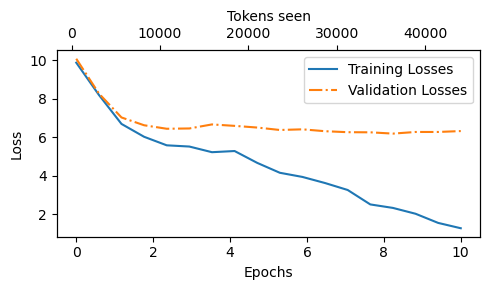

In [6]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)
num_epochs = 10
eval_freq = 5
eval_iter = 5
start_context = 'Every effort moves you'

model.to(device)
train_losses, val_losses, num_tokens_seen = train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                                                               eval_freq, eval_iter, start_context, tokenizer)

epochs = np.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs, num_tokens_seen, train_losses, val_losses)

### Evaluate Model by generating text

In [7]:
model.to('cpu')
model.eval() # --> disable dropout to stop randomness during inference

input_ids = text_to_token_ids(start_context, tokenizer)
num_tokens_to_generate = 25
context_size = GPT_CONFIG_124M['context_length']

token_ids = generate_text_simple(model, input_ids, context_size, num_tokens_to_generate=num_tokens_to_generate)
print('Output text:\n', token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you?"

"--I felt able to face the fact with the Sevres and silver of an exquisburn's an


### Temperature Based Probabilistic Sampling

Given a model and a prompt: Greedy decoding will always produce the same output.

In [8]:
vocab = {'closer': 0, 'every': 1, 'effort': 2, 'forward': 3, 'inches': 4, 'moves': 5, 'pizza': 6,
         'toward': 7, 'you': 8}
inverse_vocab = {k: v for v, k in vocab.items()}

next_token_logits = torch.tensor([4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79])

probs = torch.softmax(next_token_logits, dim=0)

count_dict = {k: 0 for k in inverse_vocab.keys()}
for _ in range(1000):
    next_token_id = torch.argmax(probs).item()
    count_dict[next_token_id] = count_dict[next_token_id] + 1

for k, v in count_dict.items():
    print(f'{inverse_vocab[k]}: {v}')

closer: 0
every: 0
effort: 0
forward: 1000
inches: 0
moves: 0
pizza: 0
toward: 0
you: 0


Probabilistic sampling using `torch.multinomial` samples proportional to the provided probabilities. So, tokens other than the most probable token can still be generated.

In [9]:
sampled_token_ids = torch.bincount(torch.multinomial(probs, num_samples=1000, replacement=True))
for i, f in enumerate(sampled_token_ids):
    print(f'{inverse_vocab[i]}: {f}')

closer: 56
every: 3
effort: 0
forward: 554
inches: 3
moves: 0
pizza: 0
toward: 378
you: 6


Softmax sampling with different temperatures. Lower temperatures -> more confident predictions/peaky distributions and vice versa. It can produce non sensical outputs too.

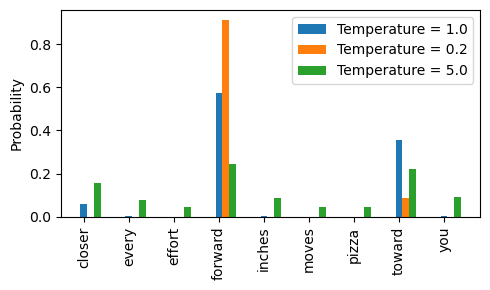

In [10]:
temps = [1.0, 0.2, 5.0]
scaled_probs = [softmax_with_temperature(next_token_logits, t) for t in temps]

x = torch.arange(len(vocab))
bar_w = 0.15
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
for i, t in enumerate(temps):
    rect = ax.bar(x + i * bar_w, scaled_probs[i], bar_w, label=f'Temperature = {t}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

sampling from `top-k` logits with `torch.multinomial` using temperature scaled softmax probabilities.  

In [11]:
top_k = 25
temperature = 1.4

token_ids = generate(model, input_ids, num_tokens_to_generate, context_size, 
                     temperature=temperature, top_k=top_k)

print('Output text:\n', token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you know, as's tears- axioms he said: no it was silent: "G when Stroud a deprec


In [12]:
top_k = 5
temperature = 0.5

token_ids = generate(model, input_ids, num_tokens_to_generate, context_size, 
                     temperature=temperature, top_k=top_k)

print('Output text:\n', token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you know," was one of the picture for nothing--I told Mrs.


"--she's an!




In [13]:
top_k = 25
temperature = 25.0

token_ids = generate(model, input_ids, num_tokens_to_generate, context_size, 
                     temperature=temperature, top_k=top_k)

print('Output text:\n', token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you it really work. Just to a neutral--above his hand he just been born back about." He, a rich; something


In [14]:
top_k = 25
temperature = 0.5

token_ids = generate(model, input_ids, num_tokens_to_generate, context_size, 
                     temperature=temperature, top_k=top_k)

print('Output text:\n', token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you say that, so that my hostess was "interesting": on that point I seemed to have began to stammer something


In [15]:
top_k = 5
temperature = 25.0

token_ids = generate(model, input_ids, num_tokens_to_generate, context_size, 
                     temperature=temperature, top_k=top_k)

print('Output text:\n', token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you like Jack! Of hised a dep was "Be and uncertain his pictures: glad have my hostess: themer to


### Save and Load Model, and train for one for Epoch, and Save again

In [30]:
name = 'gpt2_small_the_verdict_10'
filepath = './models/gpt2_small_the_verdict_10-model_and_optimizer.pth'

model.to(device)
save_model_and_optimizer(name, model, optimizer)
model, optimizer = load_model_and_optimizer(filepath, device, GPT_CONFIG_124M)
del model, optimizer

# do this in a new session, some adamw parameters are on cpu, so it is giving error 
# model.to(device)
# train_losses, val_losses, num_tokens_seen = train_model_simple(model, train_loader, val_loader, optimizer, device, 1,
#                                                                1, eval_iter, start_context, tokenizer)

# epochs = np.linspace(0, num_epochs, len(train_losses))
# plot_losses(epochs, num_tokens_seen, train_losses, val_losses)
# save_model_and_optimizer('gpt2_small_the_verdict_11', model, optimizer)

### Download GPT2 small (124M) model and Generate Text with it

In [17]:
settings, params = download_and_load_gpt2(model_size='124M', models_dir='./models')

print('Settings:', settings)
print('Parameter dictionary keys:', params.keys())

checkpoint: 100%|██████████| 77.0/77.0 [00:00<00:00, 25.9kiB/s]
encoder.json: 100%|██████████| 1.04M/1.04M [00:01<00:00, 725kiB/s] 
hparams.json: 100%|██████████| 90.0/90.0 [00:00<00:00, 34.1kiB/s]
model.ckpt.data-00000-of-00001: 100%|██████████| 498M/498M [18:09<00:00, 457kiB/s]    
model.ckpt.index: 100%|██████████| 5.21k/5.21k [00:00<00:00, 2.03MiB/s]
model.ckpt.meta: 100%|██████████| 471k/471k [00:01<00:00, 408kiB/s]  
vocab.bpe: 100%|██████████| 456k/456k [00:01<00:00, 393kiB/s]  


Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [34]:
modified_config_fields = {'emb_dim': 768, 'n_layers': 12, 'n_heads': 12, 'context_length': 1024, 'qkv_bias': True}
new_config = GPT_CONFIG_124M.copy()
new_config.update(modified_config_fields)
newGPT2model = GPT2Model(new_config)
newGPT2model.eval()
load_weights_into_gpt(newGPT2model, params)
newGPT2model.to(device)

GPT2Model(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadSelfAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadSelfAttention(
        (W_query): Linear(in_f

In [42]:
num_tokens_to_generate = 25
temperature = 1.5
top_k = 50
context_size = new_config['context_length']

token_ids = generate(newGPT2model, input_ids.to(device), num_tokens_to_generate, context_size, 
                     temperature=temperature, top_k=top_k)

print('Output text:\n', token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you
 on:) in in by not could we " just has N2N for in to needs " we to a?


Output does not make sense, so maybe the weights have not been properly loaded.